In [1]:
# Importing important libraries
import pandas as pd
from sklearn.model_selection import train_test_split 
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import math

In [2]:
# Loading the breast cancer dataset
from sklearn.datasets import load_breast_cancer
dataset = load_breast_cancer()
X = dataset['data']
y = dataset['target']

In [3]:
# Splitting the dataset 80-20:train-test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [4]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

Accuracy of the Naive Bayes Model:  94.73684210526315 %
Precision of the Naive Bayes Model:  0.9459459459459459
Recall of the Naive Bayes Model:  0.9722222222222222
The confusion matrix generated is:  [[38, 4], [2, 70]]


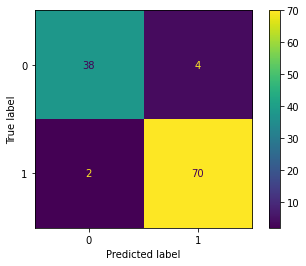

In [5]:
# Calculating model parameters
pred = clf.predict(X_test)
correct_pred = 0
true_pos = 0
true_neg = 0
false_pos = 0
false_neg = 0

for i in range(len(pred)):
    if pred[i] == y_test[i]:
        correct_pred += 1
    if pred[i] == 1 and y_test[i] == 1:
        true_pos += 1
    if pred[i] == 0 and y_test[i] == 0:
        true_neg += 1
    if pred[i] == 0 and y_test[i] == 1:
        false_neg += 1
    if pred[i] == 1 and y_test[i] == 0:
        false_pos +=1
        
accuracy = correct_pred/len(y_test)
precision = true_pos/(true_pos + false_pos)
recall = true_pos/(true_pos + false_neg)

print('Accuracy of the Naive Bayes Model: ', accuracy * 100, '%')
print('Precision of the Naive Bayes Model: ', precision)
print('Recall of the Naive Bayes Model: ', recall)
conf_matrix = [[true_neg,false_pos],[false_neg,true_pos]]
print('The confusion matrix generated is: ', conf_matrix)
plot_confusion_matrix(clf,X_test,y_test)

In [6]:
dataset = list(X)
for i in range(len(dataset)):
    dataset[i] = list(dataset[i])
    dataset[i].append(y[i])
    
from random import randrange
def partition_data(dataset, ratio):
    train_size = int(len(dataset) * ratio)
    test_set = list(dataset)
    train_set = []
    
    while len(train_set) < train_size:
        index = randrange(len(test_set))
        train_set.append(test_set.pop(index))
        
    return [train_set, test_set]

train_set, test_set = partition_data(dataset, 0.67)
print('Split total data ({0} rows) into training set ({1} rows) and testing set ({2} rows)'.format(len(dataset), len(train_set), len(test_set)))

Split total data (569 rows) into training set (381 rows) and testing set (188 rows)


In [7]:
def group_by_class(dataset):
    klass_map = {}
    for el in dataset:
        klass = int(el[-1])
        if klass not in klass_map:
            klass_map[klass] = []
        klass_map[klass].append(el[:-1])
    return klass_map

classified_set = group_by_class(train_set)

for klass, data_points in classified_set.items():
    print('Class {0} contains {1} data points'.format(klass, len(data_points)))

Class 1 contains 237 data points
Class 0 contains 144 data points


In [8]:
def mean(n):
    return sum(n) / float(len(n))

def stdev(n):
    average = mean(n)
    return math.sqrt(sum([pow(x - average, 2) for x in n]) / float(len(n) - 1))

In [9]:
import multiprocessing as mp

def format_calc(t):
    return (mean(t), stdev(t))

def prepare_data(dataset):
    pool = mp.Pool(mp.cpu_count())
    summary = {}
    for klass, data_points in dataset.items():
        summary[klass] = pool.map(format_calc, zip(*data_points))
    pool.close()
    pool.join()
    return summary

summary_set = prepare_data(classified_set)

for klass, tupl in summary_set.items():
    print('Class {0} contains {1} tuples'.format(klass, len(tupl)))

Class 1 contains 30 tuples
Class 0 contains 30 tuples


In [10]:
def gauss(x, mean, stdev):
    ex = math.exp(-(math.pow(x - mean, 2) / (2 * math.pow(stdev, 2))))
    return (1 / (math.sqrt(2 * math.pi) * stdev)) * ex

In [11]:
def predict(summary_set, data_point):
    probabilities = {}
    for klass, summary in summary_set.items():
        probabilities[klass] = 1
        for i in range(len(summary)):
            mean, stdev = summary[i]
            probabilities[klass] *= gauss(data_point[i], mean, stdev)
    return max(probabilities.keys(), key=(lambda key: probabilities[key]))

In [12]:
def get_accuracy(summary_set, test_set):
    correct_count = 0
    for test_point in test_set:
        if test_point[-1] == predict(summary_set, test_point):
            correct_count += 1
    return correct_count / float(len(test_set)) * 100

accuracy = get_accuracy(summary_set, test_set)

print('The Naive-Bayes Model yields {0}% accuracy'.format(round(accuracy, 2)))

The Naive-Bayes Model yields 90.43% accuracy


Accuracy of the Naive Bayes Model:  90.42553191489363 %
Precision of the Naive Bayes Model:  0.9322033898305084
Recall of the Naive Bayes Model:  0.9166666666666666
The confusion matrix generated is:  [[60, 8], [10, 110]]


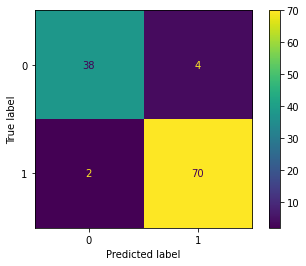

In [13]:
# Calculating model parameters
pred = []
for test_point in test_set:
  pred.append(predict(summary_set,test_point))
correct_pred = 0
true_pos = 0
true_neg = 0
false_pos = 0
false_neg = 0
for i in range(len(pred)):
    if pred[i] == test_set[i][-1]:
        correct_pred += 1
    if pred[i] == 1 and test_set[i][-1] == 1:
        true_pos += 1
    if pred[i] == 0 and test_set[i][-1] == 0:
        true_neg += 1
    if pred[i] == 0 and test_set[i][-1] == 1:
        false_neg += 1
    if pred[i] == 1 and test_set[i][-1] == 0:
        false_pos +=1
        
accuracy = correct_pred/len(test_set)
precision = true_pos/(true_pos + false_pos)
recall = true_pos/(true_pos + false_neg)

print('Accuracy of the Naive Bayes Model: ', accuracy * 100, '%')
print('Precision of the Naive Bayes Model: ', precision)
print('Recall of the Naive Bayes Model: ', recall)
conf_matrix = [[true_neg,false_pos],[false_neg,true_pos]]
print('The confusion matrix generated is: ', conf_matrix)
plot_confusion_matrix(clf,X_test,y_test)